Data is from.  

[https://www.energy.ca.gov/files/zev-and-infrastructure-stats-data](https://www.energy.ca.gov/files/zev-and-infrastructure-stats-data)

# Notebook Setup

In [ ]:
import numpy as np
import os
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
def concatenator(base_dir, folder):
  ''' 
  Takes in file directory and specific folder name.
  Returns all files in directory as a single pd.DF   
  '''

  files = os.listdir(base_dir + folder)

  # append all files to
  dfs = []

  # loop over files in folder and append to dfs list
  for file_ in files:
    df = pd.read_csv(os.path.join(base_dir, folder, file_))
    dfs.append(df)

  return pd.concat(dfs, axis=0, ignore_index=True)

# Zip Code Ground Truth
San Diego COUNTY Zip Code list is from [sdcourt.ca.gov/sdcourt/familyandchildren2/wheretofile/zipcodedirectory](https://www.sdcourt.ca.gov/sdcourt/familyandchildren2/wheretofile/zipcodedirectory).

<br><br>
**Zip Code Ground Truth will be utilize to filter out any unnecessary Zip Codes from other Data Tables.**

In [ ]:
# read in GROUND TRUTH
file_path = '/content/drive/MyDrive/Project_508/Cleaned Data/Zip_Codes_by_Court_District_GROUND_TRUTH.csv'
offficial_zip_code_df = pd.read_csv(file_path)
offficial_zip_codes = offficial_zip_code_df['ZIP CODE']
offficial_zip_codes[:3]

0    91901.0
1    91902.0
2    91903.0
Name: ZIP CODE, dtype: float64

# Vehicle Registration EDA

Source: [https://www.energy.ca.gov/files/zev-and-infrastructure-stats-data](https://www.energy.ca.gov/files/zev-and-infrastructure-stats-data)

Data set covers all alternative fuel vehicle registrations for the whole state of California.

In [ ]:
veh_df = pd.read_excel('/content/drive/MyDrive/Project_508/Raw Data/Vehicle Population_Last updated 04-30-2021.xlsx',
                   sheet_name='ZIP')

# print shape
print(f'Shape {veh_df.shape}\n', '--'*20)

veh_df.head(3)

Shape (175291, 4)
 ----------------------------------------


,Data Year,Fuel Type,ZIP,Number of Vehicles
0,2010,Bio Diesel,90010,3
1,2010,Bio Diesel,90019,1
2,2010,Bio Diesel,90047,1


In [ ]:
nonSD_Zip_Codes = len(set(veh_df[~veh_df['ZIP'].isin(offficial_zip_codes)]['ZIP']))
print(f'There is a total of {nonSD_Zip_Codes} non-San Diego Zip Codes.')

There is a total of 2508 non-San Diego Zip Codes.


In [ ]:
# Filter out rows not related to San Diego
veh_df = veh_df[veh_df['ZIP'].isin(offficial_zip_codes)].copy()
veh_df.shape

(12744, 4)

In [ ]:
veh_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12744 entries, 106 to 174880
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Data Year           12744 non-null  int64 
 1   Fuel Type           12744 non-null  object
 2   ZIP                 12744 non-null  int64 
 3   Number of Vehicles  12744 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 497.8+ KB


In [ ]:
# change col_names to something easier to work with
veh_df.rename(columns={'Data Year':'Year',
                                        'Fuel Type':'Fuel',
                                        'Number of Vehicles':'#_vehicles'},
                               inplace=True)

In [ ]:
veh_df['#_vehicles'].describe()

count    12744.000000
mean      1883.581058
std       6726.591164
min          1.000000
25%          5.000000
50%         37.000000
75%        424.250000
max      66237.000000
Name: #_vehicles, dtype: float64

Interesting to see, that the average is 37 vehicles.  What about number of vehicles by year.  But the max count of vehicles is 66k!

In [ ]:
veh_df['Year'].min()

2010

In [ ]:
veh_df[veh_df['#_vehicles'] > 66000]

,Year,Fuel,ZIP,#_vehicles
169479,2020,Gasoline,92154,66237


That makes sense.  There was a total of 66k gasoline vehicles registered to a region just north of the border.  Interesting to see that region having the most registered gasoline vehicles for 2020.

## Avg Vehicles Registered by Zip Code by Year

In [ ]:
avg_reg_zip_by_year = veh_df.groupby(['ZIP','Year']).mean()

avg_reg_zip_by_year

#_vehicles
ZIP   Year             
91901 2010  1890.333333
      2011  1412.750000
      2012  1396.875000
      2013  1436.875000
      2014  1318.111111
...                 ...
92199 2016     5.666667
      2017     7.500000
      2018     7.000000
      2019     7.000000
      2020     3.000000

[2042 rows x 1 columns]

In [ ]:
# convert double index to columns
avg_reg_zip_by_year = avg_reg_zip_by_year.reset_index()

avg_reg_zip_by_year['#_vehicles'].max()

9009.4

In [ ]:
avg_reg_zip_by_year[avg_reg_zip_by_year['#_vehicles'] == 9009.4]

,ZIP,Year,#_vehicles
1400,92126,2010,9009.4


The Zip Code of 92126 (Mira Mesa) had the most registered vehicles on average in the year of 2010.

On the other end Zip Code 92199 has a low amount of vehicle registrations per year.

But after further inpsection:

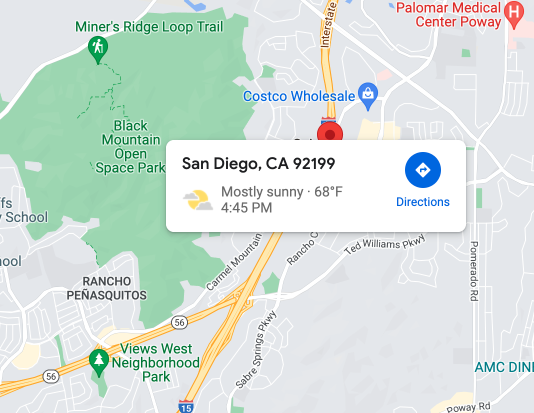

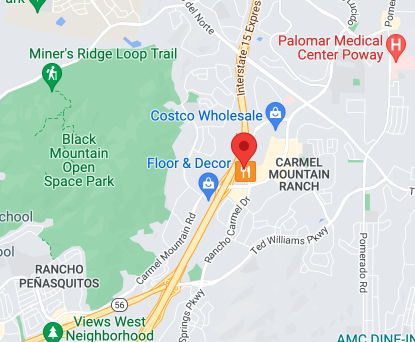

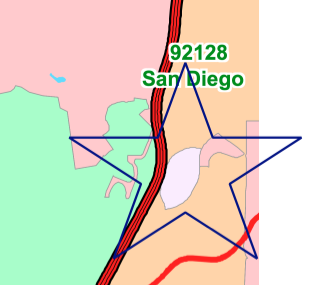

We see it is a very small Zip Code in comparison to other Zip Codes, though there are other tiny zip codes within the San Diego Region as pointed out with arrows down below.

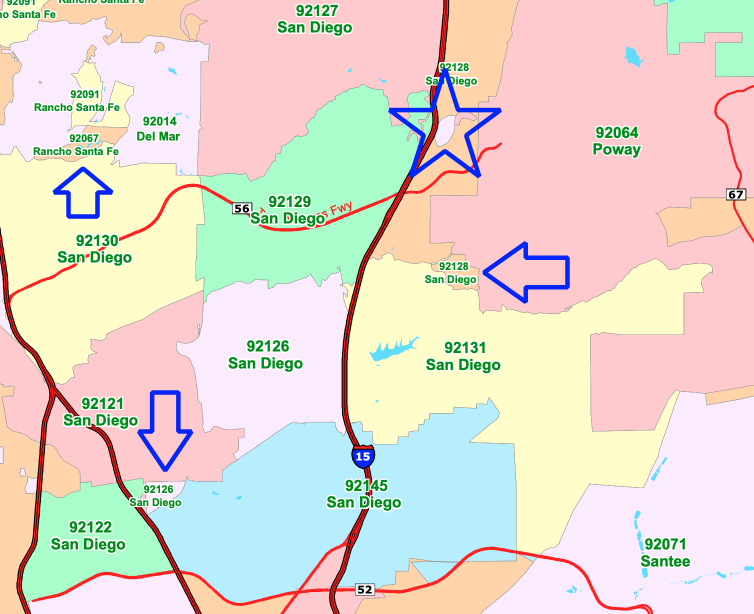

In [ ]:
avg_reg_zip_by_year[avg_reg_zip_by_year['ZIP'] == 92199]

,ZIP,Year,#_vehicles
2031,92199,2010,4.000000
2032,92199,2011,3.333333
2033,92199,2012,2.333333
2034,92199,2013,2.666667
2035,92199,2014,2.333333
2036,92199,2015,6.500000
2037,92199,2016,5.666667
2038,92199,2017,7.500000
2039,92199,2018,7.000000
2040,92199,2019,7.000000


In [ ]:
avg_reg_zip_by_year[avg_reg_zip_by_year['ZIP'] == 92126]

,ZIP,Year,#_vehicles
1400,92126,2010,9009.400000
1401,92126,2011,6368.285714
1402,92126,2012,5597.000000
1403,92126,2013,5861.000000
1404,92126,2014,5365.888889
1405,92126,2015,5434.000000
1406,92126,2016,5638.333333
1407,92126,2017,5702.400000
1408,92126,2018,5763.300000
1409,92126,2019,5808.200000


In [ ]:
avg_reg_zip_by_year[avg_reg_zip_by_year['ZIP'] == 92128]

,ZIP,Year,#_vehicles
1422,92128,2010,6247.800000
1423,92128,2011,3917.500000
1424,92128,2012,3895.875000
1425,92128,2013,4023.250000
1426,92128,2014,4095.125000
1427,92128,2015,4122.875000
1428,92128,2016,4238.625000
1429,92128,2017,4194.666667
1430,92128,2018,4195.777778
1431,92128,2019,4204.444444


That is strange, other small zip codes have a large amount of registered vehicles, maybe 92199 doesn't have much residential space?  We will save this question for when we peek in to our Census Data.

In [ ]:
list(set(avg_reg_zip_by_year[avg_reg_zip_by_year['#_vehicles'] < 10]['ZIP']))[:10]

[92096, 92161, 92162, 92194, 92132, 92164, 92197, 92199, 91947, 91987]

It appears there a quiet a few small towns with low vehicle registration rates, such as 91987 (last on the list), which is Tecate, California. 

Strangely enough, the first on the list, 91943, does not show on the [California Title Company map](https://www.titleadvantage.com/mdocs/SD_ZipCodes_South.pdf).

### Continuation of other EDA

In [ ]:
#determine the number of unique values for each column
dict=[]
for i in veh_df.columns:
  print(f'{i} has {veh_df[i].nunique()} unique values')

Year has 11 unique values
Fuel has 10 unique values
ZIP has 188 unique values
#_vehicles has 2403 unique values


In [ ]:
#determine the unique values for the year and fuel columns
print("Year can take on:\n", veh_df.Year.value_counts(), "\n")
print("Fuel can take on:\n", veh_df.Fuel.value_counts(), "\n")

Year can take on:
 2020    1308
2019    1302
2018    1290
2017    1255
2016    1203
2015    1165
2014    1142
2013    1117
2012    1086
2011    1023
2010     853
Name: Year, dtype: int64 

Fuel can take on:
 Gasoline           2040
Flex Fuel          1925
Diesel             1869
Gasoline Hybrid    1868
Bio Diesel         1267
PHEV               1170
Electric           1169
Natural Gas         918
Propane             323
Hydrogen            195
Name: Fuel, dtype: int64 



In [ ]:
# Identifying Null Values

#check for missing data in the dataset
veh_df.isnull().sum()

Year          0
Fuel          0
ZIP           0
#_vehicles    0
dtype: int64

## Plots and Visualizations

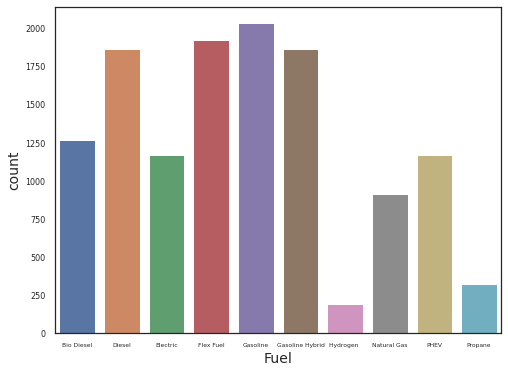

In [ ]:
colors = sns.color_palette('pastel')
sns.set(rc={'figure.figsize':(8,6)})
plt.rc('xtick', labelsize=6)
plt.rc('ytick', labelsize=8)
plt.rc('axes', titlesize=14)
plt.rc('axes', labelsize=14)
plt.rc('legend', fontsize=14)
plt.rc('font', size=8)
sns.set_style('white')

#frequency distribution Fuel
sns.countplot(data = veh_df, x = 'Fuel')

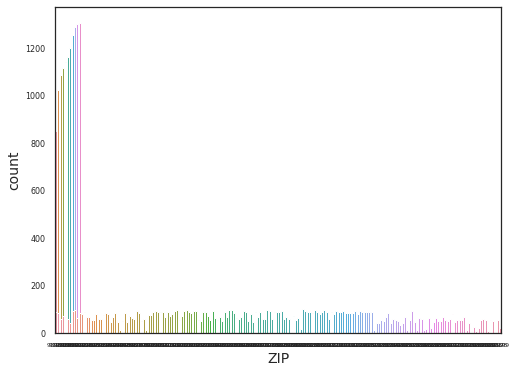

In [ ]:
# Distribution Visualizations

#frequency distribution Year
sns.countplot(data = veh_df, x = 'Year')

#frequency distribution Zipcode
sns.countplot(data = veh_df, x = 'ZIP')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated

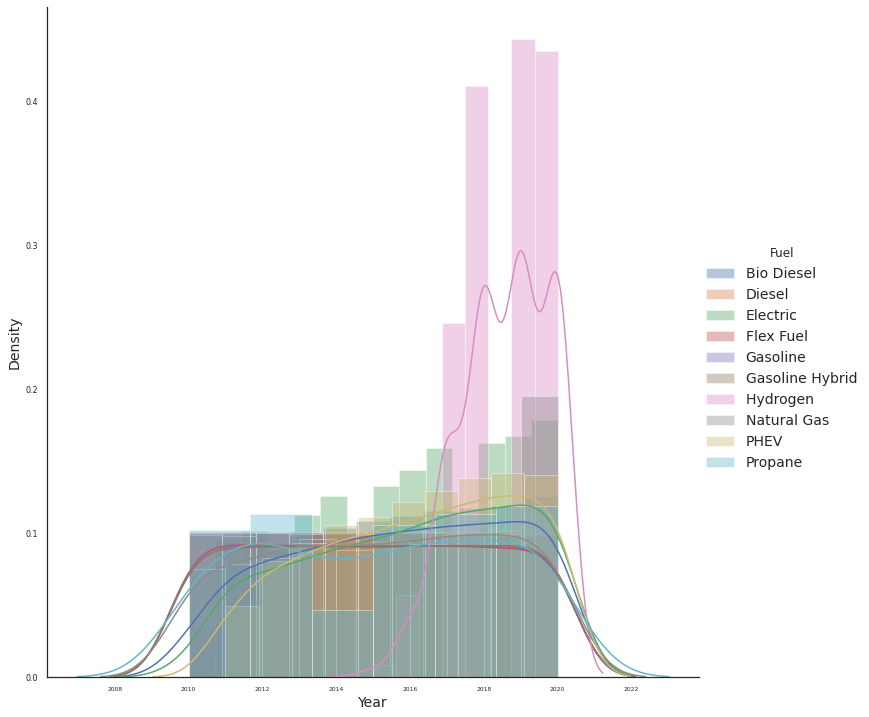

In [ ]:
#analysis for Fuel

sns.FacetGrid(veh_df, hue='Fuel', size = 10).map(sns.distplot, "Year").add_legend()

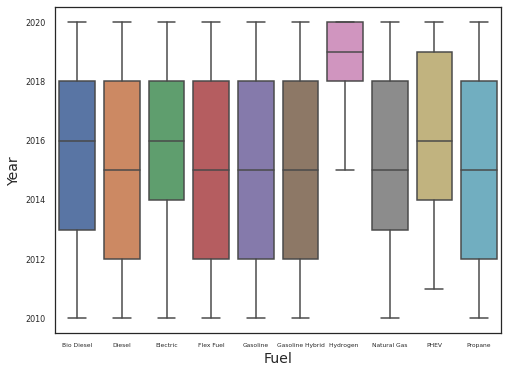

In [ ]:
#Further analysis for Fuel

#box plot for fuel vs Year
sns.boxplot(x='Fuel', y='Year', data=veh_df)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


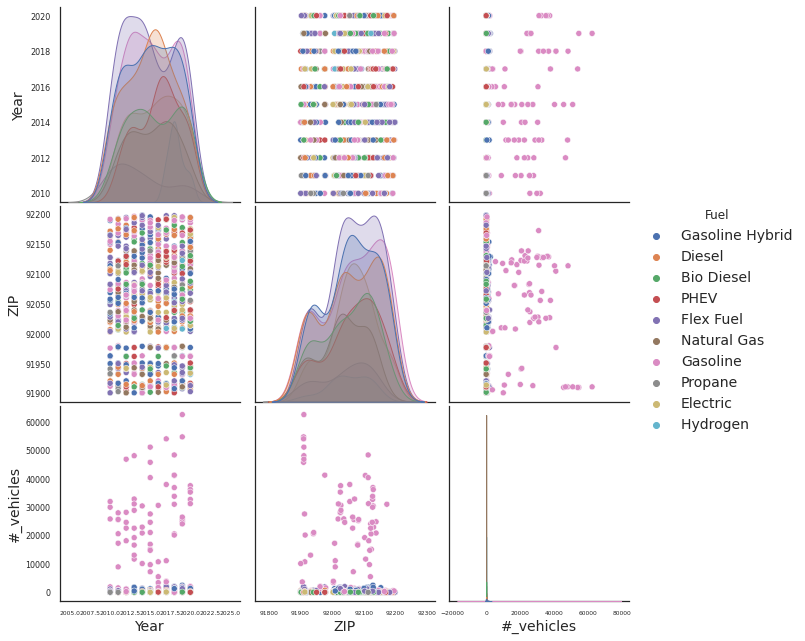

In [ ]:
#pairplot for the data
sns.pairplot(veh_df.sample(1000), hue='Fuel', size=3)
plt.show()

### Correlation Analysis


Text(0.5, 1.0, 'Correlation Heatmap')

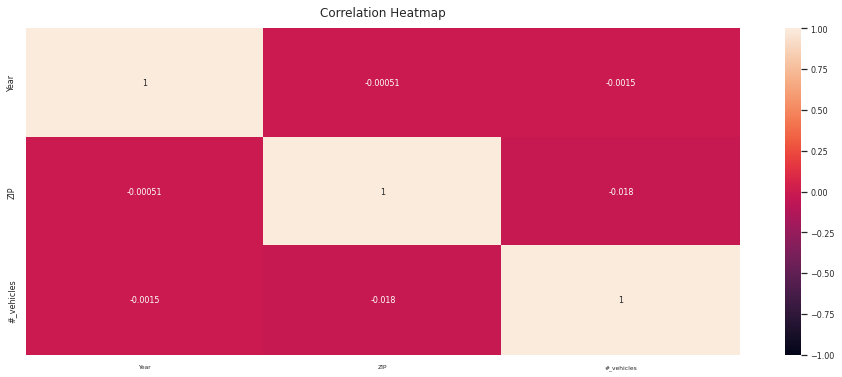

In [ ]:
#correlation plot to determine correlations between variables.
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(veh_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [ ]:
veh_df.groupby(['ZIP','Year', 'Fuel', '#_vehicles']).mean().iloc[:,1:]

Empty DataFrame
Columns: []
Index: [(91901, 2010, Bio Diesel, 1), (91901, 2010, Diesel, 729), (91901, 2010, Flex Fuel, 286), (91901, 2010, Gasoline, 10144), (91901, 2010, Gasoline Hybrid, 180), (91901, 2010, Natural Gas, 2), (91901, 2011, Bio Diesel, 12), (91901, 2011, Diesel, 706), (91901, 2011, Electric, 3), (91901, 2011, Flex Fuel, 332), (91901, 2011, Gasoline, 10047), (91901, 2011, Gasoline Hybrid, 198), (91901, 2011, Natural Gas, 2), (91901, 2011, PHEV, 2), (91901, 2012, Bio Diesel, 23), (91901, 2012, Diesel, 649), (91901, 2012, Electric, 3), (91901, 2012, Flex Fuel, 392), (91901, 2012, Gasoline, 9850), (91901, 2012, Gasoline Hybrid, 252), (91901, 2012, Natural Gas, 2), (91901, 2012, PHEV, 4), (91901, 2013, Bio Diesel, 35), (91901, 2013, Diesel, 687), (91901, 2013, Electric, 12), (91901, 2013, Flex Fuel, 475), (91901, 2013, Gasoline, 9963), (91901, 2013, Gasoline Hybrid, 315), (91901, 2013, Natural Gas, 1), (91901, 2013, PHEV, 7), (91901, 2014, Bio Diesel, 50), (91901, 2014, Diesel, 743), (91901, 2014, Electric, 14), (91901, 2014, Flex Fuel, 548), (91901, 2014, Gasoline, 10112), (91901, 2014, Gasoline Hybrid, 376), (91901, 2014, Natural Gas, 2), (91901, 2014, PHEV, 17), (91901, 2014, Propane, 1), (91901, 2015, Bio Diesel, 62), (91901, 2015, Diesel, 795), (91901, 2015, Electric, 20), (91901, 2015, Flex Fuel, 598), (91901, 2015, Gasoline, 10292), (91901, 2015, Gasoline Hybrid, 389), (91901, 2015, Natural Gas, 2), (91901, 2015, PHEV, 26), (91901, 2016, Bio Diesel, 81), (91901, 2016, Diesel, 827), (91901, 2016, Electric, 26), (91901, 2016, Flex Fuel, 663), (91901, 2016, Gasoline, 10294), (91901, 2016, Gasoline Hybrid, 426), (91901, 2016, Natural Gas, 2), (91901, 2016, PHEV, 42), (91901, 2017, Bio Diesel, 130), (91901, 2017, Diesel, 861), (91901, 2017, Electric, 31), (91901, 2017, Flex Fuel, 811), (91901, 2017, Gasoline, 11618), (91901, 2017, Gasoline Hybrid, 471), (91901, 2017, Natural Gas, 2), (91901, 2017, PHEV, 66), (91901, 2018, Bio Diesel, 179), (91901, 2018, Diesel, 824), (91901, 2018, Electric, 58), (91901, 2018, Flex Fuel, 804), (91901, 2018, Gasoline, 11672), (91901, 2018, Gasoline Hybrid, 507), (91901, 2018, Natural Gas, 2), (91901, 2018, PHEV, 79), (91901, 2019, Bio Diesel, 212), (91901, 2019, Diesel, 859), (91901, 2019, Electric, 83), (91901, 2019, Flex Fuel, 808), (91901, 2019, Gasoline, 11641), (91901, 2019, Gasoline Hybrid, 518), (91901, 2019, Natural Gas, 4), (91901, 2019, PHEV, 78), (91901, 2020, Bio Diesel, 260), (91901, 2020, Diesel, 844), (91901, 2020, Electric, 95), (91901, 2020, Flex Fuel, 812), (91901, 2020, Gasoline, 11523), (91901, 2020, Gasoline Hybrid, 557), (91901, 2020, Hydrogen , 1), (91901, 2020, Natural Gas, 3), (91901, 2020, PHEV, 86), (91902, 2010, Diesel, 327), (91902, 2010, Flex Fuel, 241), (91902, 2010, Gasoline, 12467), (91902, 2010, Gasoline Hybrid, 227), (91902, 2010, Natural Gas, 2), (91902, 2011, Bio Diesel, 1), (91902, 2011, Diesel, 318), (91902, 2011, Electric, 7), (91902, 2011, Flex Fuel, 270), (91902, 2011, Gasoline, 12252), (91902, 2011, Gasoline Hybrid, 274), (91902, 2011, Natural Gas, 2), ...]

[12744 rows x 0 columns]

# Census data EDA

Census data is pulled from [data.census.gov/](https://data.census.gov/).  Due to the nature of the graphical user interface, a range of zip codes starting from 91902 to 92210 was pulled.  In which some Zip Codes are representitive of the non San Diego regions.  For example, 92210 is a region within Palm Dessert.

In [ ]:
We currently only have pop data from the 2020 census.  Will be adding more years as we continue.

In [ ]:
file_path = '/content/drive/MyDrive/Project_508/Raw Data/populations.xlsx'
census_df = pd.read_excel(file_path, sheet_name='Data')

# remove first column of Label/Total
census_df = census_df.iloc[:,1:]

# print shape
print(f'Shape {census_df.shape}\n', '--'*20)

census_df.head(3)

Shape (2, 222)
 ----------------------------------------


,ZCTA5 91901,Unnamed: 2,ZCTA5 91902,Unnamed: 4,ZCTA5 91905,Unnamed: 6,ZCTA5 91906,Unnamed: 8,ZCTA5 91910,Unnamed: 10,...,ZCTA5 92173,Unnamed: 214,ZCTA5 92201,Unnamed: 216,ZCTA5 92203,Unnamed: 218,ZCTA5 92210,Unnamed: 220,ZCTA5 92211,Unnamed: 222
0,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,...,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error,Estimate,Margin of Error
1,"17,896","±1,530","17,760","±1,652","1,665",±426,"4,327",±640,"74,233","±2,892",...,"31,248","±2,152","64,967","±2,458","32,360","±2,572","5,137",±150,"25,530","±1,624"


As we can see, the dataset isn't pandas friendly by a long shot.  Let's do some tidying up.

We will be iterating through the whole dataframe, grabbing 2 columns at a time and melting them into something pandas legible.


In [ ]:
census_df.iloc[:,:2]

,ZCTA5 91901,Unnamed: 2
0,Estimate,Margin of Error
1,"17,896","±1,530"


In [ ]:
census_df.iloc[:,2:4]

,ZCTA5 91902,Unnamed: 4
0,Estimate,Margin of Error
1,"17,760","±1,652"


In [ ]:
zip_data = []
# loop through multiple of 2 columns per loop
indices = list(range(2,222,2))
for i in range(len(indices)):

# @ end of for loop will throw an OUT OF RANGE error due to max_
  try:
    min_ = indices[i]
    max_ = indices[i+1]

    # list to store data
    row = []
    # get row Zip Code
    row.append(census_df.iloc[:,min_:max_].columns[0])

    # gather zip code data
    data = list(census_df.iloc[1,min_:max_])
    # get row pop esimate
    row.append(data[0])
    # get row pop Margine Error
    row.append(data[1])
    
    # append data to master list
    zip_data.append(row)
  except:
    pass

# delete old Census_DF
del(census_df)
# write melted frame to 
census_df = pd.DataFrame(zip_data, columns=['Zip', 'Est', 'MOE'])
census_df.head(3)

,Zip,Est,MOE
0,ZCTA5 91902,"17,760","±1,652"
1,ZCTA5 91905,"1,665",±426
2,ZCTA5 91906,"4,327",±640


In [ ]:
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zip     109 non-null    object
 1   Est     109 non-null    object
 2   MOE     109 non-null    object
dtypes: object(3)
memory usage: 2.7+ KB


As we can see, all three columns have unecessary columns that would allow us to convert all columns to int.

In [ ]:
# remove ZCTA5
census_df['Zip'] = census_df['Zip'].str.replace('ZCTA5', '')
census_df.head(3)

,Zip,Est,MOE
0,91902,"17,760","±1,652"
1,91905,"1,665",±426
2,91906,"4,327",±640


In [ ]:
# remove unwanted chars
census_df['Est'] = census_df['Est'].str.replace(',', '')

census_df['MOE'] = census_df['MOE'].str.replace('±', '')
census_df['MOE'] = census_df['MOE'].str.replace(',', '')

print(census_df.dtypes, '\n')
census_df.head(3)

Zip    object
Est    object
MOE    object
dtype: object 



,Zip,Est,MOE
0,91902,17760,1652
1,91905,1665,426
2,91906,4327,640


In [ ]:
for col in census_df.columns:
  census_df[col] = census_df[col].astype(int)

census_df.dtypes

Zip    int64
Est    int64
MOE    int64
dtype: object

#### Remove Unwanted Zip Code

In [ ]:
census_df[~census_df['Zip'].isin(offficial_zip_codes)]

,Zip,Est,MOE
106,92201,64967,2458
107,92203,32360,2572
108,92210,5137,150


As we can see, we have 3 non San Diego Zip Code.  With all 3 zip codes corresponding to areas within the Riverside County region.

In [ ]:
# Filter out rows not related to San Diego
census_df = census_df[census_df['Zip'].isin(offficial_zip_codes)].copy()
census_df.shape

(106, 3)

## Continuation of EDA

In [ ]:
census_df.isnull().sum()

Zip    0
Est    0
MOE    0
dtype: int64

In [ ]:
census_df.iloc[:,1:].describe()

,Est,MOE
count,106.000000,106.000000
mean,31138.896226,1589.556604
std,24124.807498,1038.653158
min,0.000000,13.000000
25%,4781.750000,524.750000
50%,32014.000000,1748.000000
75%,50037.500000,2255.750000
max,89886.000000,4380.000000


In [ ]:
census_df[census_df['Est'] == 0]

,Zip,Est,MOE
23,91980,0,13
96,92132,0,13


Well that is interesting, we have two zip codes with a population of 0, yet there is an estimated error of ±13.



*   91980 is Tecate, CA
*   92132 is a small district where the USS Midway Museum is located alongside other US Navy related buildings



In [ ]:
census_df.shape

(106, 3)

In [ ]:
#determine the number of unique values for each column
dict=[]
for i in census_df.columns:
  print(f'{i} has {census_df[i].nunique()} unique values')

# Zip is zipcode; Est is estimated populaiton; and MOE is margin of error

Zip has 106 unique values
Est has 105 unique values
MOE has 102 unique values


As we can see, each row in the dataset corrosponds to a unique Zip Code. 

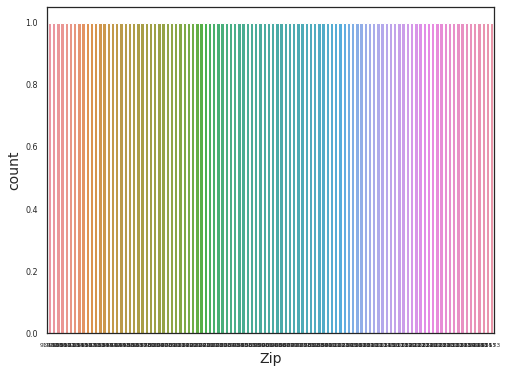

In [ ]:
#frequency distribution Zip
sns.countplot(data=census_df, x='Zip')

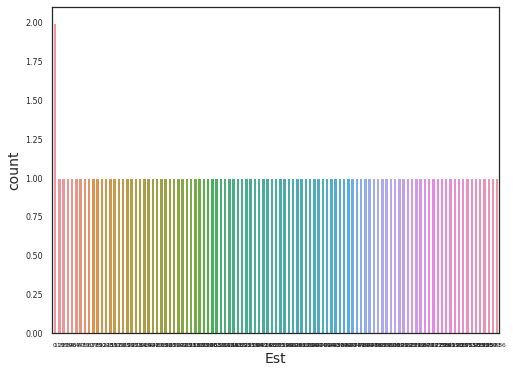

In [ ]:
#frequency distribution Est
sns.countplot(data=census_df, x='Est')

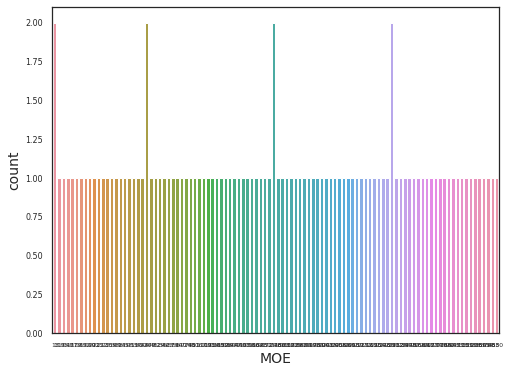

In [ ]:
#frequency distribution MOE
sns.countplot(data=census_df, x='MOE')

In [ ]:
census_df.head()

,Zip,Est,MOE
0,91902,17760,1652
1,91905,1665,426
2,91906,4327,640
3,91910,74233,2892
4,91911,88593,3745


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text major ticklabel objects>)

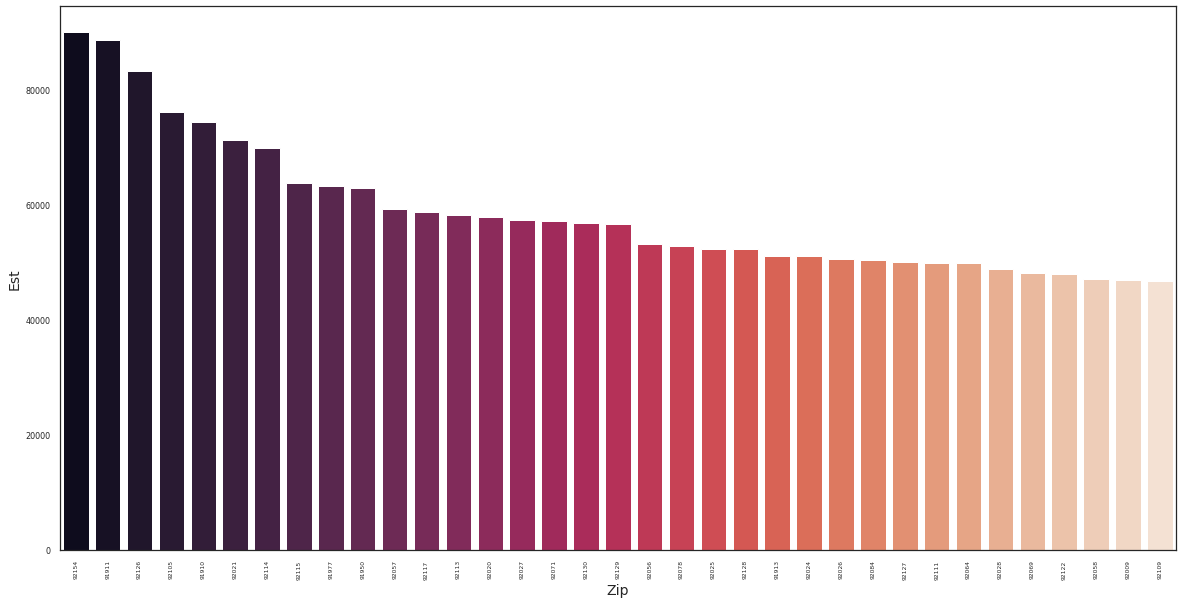

In [ ]:
# Display top 35 most populated zip codes
plt.figure(figsize=(20, 10))

scope = census_df.sort_values(by='Est', ascending=False).reset_index(drop=True)[:35]

sns.barplot(data=scope,
            x=scope['Zip'],
            y=scope['Est'],
            order=scope['Zip'],
            palette='rocket')

plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34]), <a list of 35 Text major ticklabel objects>)

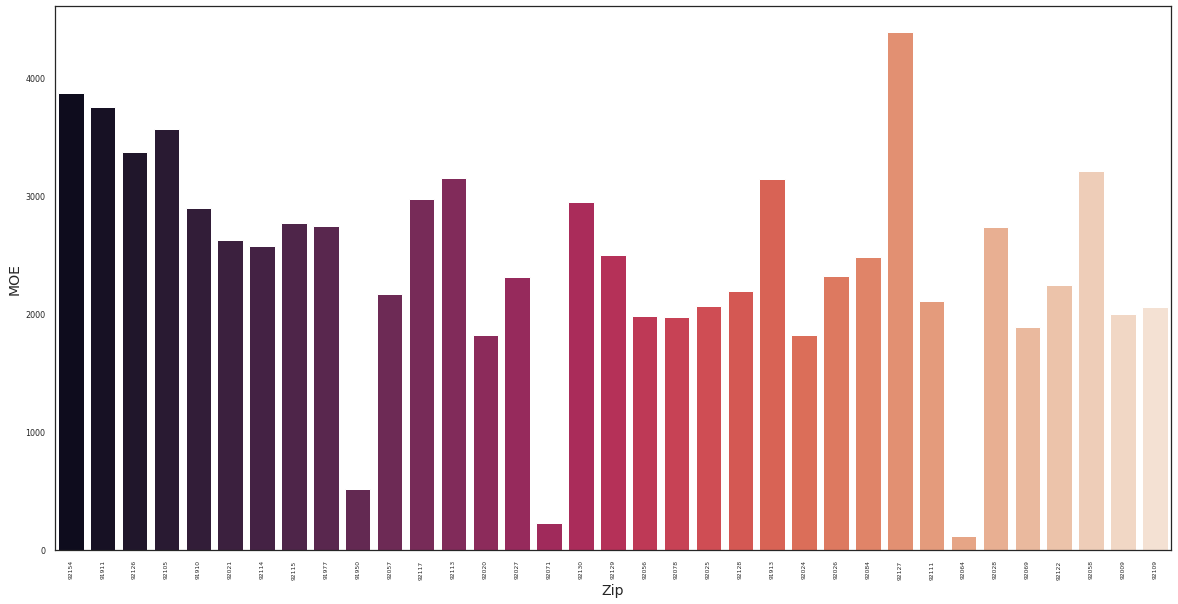

In [ ]:
# Display top 35 most populated zip codes
plt.figure(figsize=(20, 10))

sns.barplot(data=scope,
            x=scope['Zip'],
            y=scope['MOE'],
            order=scope['Zip'],
            palette='rocket')

plt.xticks(rotation=90)

In [ ]:
scope.sort_values(by='Est', ascending=False)[:20]

,Zip,Est,MOE
0,92154,89886,3863
1,91911,88593,3745
2,92126,83257,3369
3,92105,75990,3561
4,91910,74233,2892
5,92021,71183,2627
6,92114,69858,2569
7,92115,63755,2766
8,91977,63267,2739
9,91950,62783,519


Interesting to see that the top 35 mos populated have a wide range of Margin of Error.  With the most accurate being 92071.

# WEATHER

Weather Data is pulled from [weather.gov/sgx/cliplot](https://www.weather.gov/sgx/cliplot)

In [ ]:
dfs = []

weather_folders = os.listdir('/content/drive/MyDrive/Project_508/Raw Data/Scraped_Gov_Weather')

for folder in weather_folders:
  parent_dir = f'/content/drive/MyDrive/Project_508/Raw Data/Scraped_Gov_Weather/{folder}'

  children_folders = os.listdir(parent_dir)

  for child_folder in children_folders:
    child_dir = parent_dir + '/' + f'{child_folder}'
    
    files = os.listdir(child_dir)

    for file_ in files:
      file_path = child_dir + '/' + file_
      df = pd.read_csv(file_path)


      date = df.iloc[0,1]

      # grab only observed lowh/igh, and normal low/high
      df = df.iloc[1:,1:6]

      # make the first row into the column names
      df.rename(columns={'0': df.iloc[0,0],
              '1': df.iloc[0,1],
              '2': df.iloc[0,2],
              '3': df.iloc[0,3],
              '4': df.iloc[0,4]},
              inplace=True)

      # drop first row of column names
      df = df.iloc[1:,:]

      # remove last row which contains Average for each columnd
      del_last_row = df.shape[0] - 1
      df = df.iloc[0:del_last_row,:]

      # write location name from folder variable
      df['location'] = folder

      # get date and assign to columns
      date_list = date.split(' ')[1]
      df['Month'] = date_list.split('/')[0]
      df['Year'] = date_list.split('/')[1]


      dfs.append(df)



clean_data_dir = '/content/drive/MyDrive/Project_508/Cleaned Data/'
weather_df = pd.concat(dfs)
weather_df = weather_df.reset_index(drop=True)
weather_df.to_parquet(clean_data_dir + 'weather_w_normal_obs.parquet.gzip', compression='gzip')

In [ ]:
weather_df = pd.read_parquet('/content/drive/MyDrive/Project_508/Cleaned Data/weather_w_normal_obs.parquet.gzip')

# change colum names to something easier to work with
weather_df.rename(columns={'ObservedLow(F)': 'Low',
                           'ObservedHigh(F)': 'High',
                           'NormalLow(F)': 'NormLow',
                           'NormalHigh(F)': 'NormHigh'},
                  inplace=True)
                    
weather_df.head(3)

,Date,Low,High,NormLow,NormHigh,location,Month,Year
0,1,44,60,49,65,linbergh_field,01,2009
1,2,49,55,49,65,linbergh_field,01,2009
2,3,52,57,49,65,linbergh_field,01,2009


In [ ]:
date_columns = ['Date','Month','Year']
weather_df['Full_date'] = weather_df.loc[:,date_columns].apply(lambda x: '/'.join(x.values.astype(str)), axis='columns')

weather_df['Full_date'] = pd.to_datetime(weather_df['Full_date'])
weather_df.dtypes

Date                 object
Low                  object
High                 object
NormLow              object
NormHigh             object
location             object
Month                object
Year                 object
Full_date    datetime64[ns]
dtype: object

In [ ]:
weather_df.head(3)

,Date,Low,High,NormLow,NormHigh,location,Month,Year,Full_date
0,1,44,60,49,65,linbergh_field,01,2009,2009-01-01
1,2,49,55,49,65,linbergh_field,01,2009,2009-02-01
2,3,52,57,49,65,linbergh_field,01,2009,2009-03-01


In [ ]:
locations = list(set(weather_df['location']))

print(f'There are {len(locations)} within the weather dataset. They are:')
locations

There are 7 within the weather dataset. They are:


['Campo',
 'San Diego Mont. Field',
 'Ramona',
 'San Diego Brown Field',
 'Carlsbad',
 'linbergh_field',
 'Oceanside Airport']

## EDA for Weather Data

In [ ]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33237 entries, 0 to 33236
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       33237 non-null  object        
 1   Low        33237 non-null  object        
 2   High       33237 non-null  object        
 3   NormLow    33237 non-null  object        
 4   NormHigh   33237 non-null  object        
 5   location   33237 non-null  object        
 6   Month      33237 non-null  object        
 7   Year       33237 non-null  object        
 8   Full_date  33237 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(8)
memory usage: 2.3+ MB


In [ ]:
weather_df.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,Date,Low,High,NormLow,NormHigh,location,Month,Year,Full_date
count,33237,33237,33237,33237,33237,33237,33237,33237,33237
unique,31,71,79,39,36,7,12,13,4748
top,1,M,M,-99,66,San Diego Brown Field,01,2020,2020-06-11 00:00:00
freq,1092,1520,1518,2920,3452,4754,3100,2921,20
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009-01-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-12-31 00:00:00


In [ ]:
high_M = weather_df[weather_df['High'] == 'M']
high_M.head()

,Date,Low,High,NormLow,NormHigh,location,Month,Year,Full_date
1002,30,M,M,63,74,linbergh_field,09,2011,2011-09-30
2861,1,M,M,57,71,linbergh_field,11,2016,2016-01-11
2862,2,M,M,57,71,linbergh_field,11,2016,2016-02-11
2863,3,M,M,57,71,linbergh_field,11,2016,2016-03-11
2864,4,M,M,57,71,linbergh_field,11,2016,2016-04-11


In [ ]:
high_M.shape

(1518, 9)

In [ ]:
norm_high_M = weather_df[weather_df['NormHigh'] == 'M']
norm_high_M.head(3)

,Date,Low,High,NormLow,NormHigh,location,Month,Year,Full_date
10220,1,40,59,M,M,Carlsbad,01,2011,2011-01-01
10221,2,43,59,M,M,Carlsbad,01,2011,2011-02-01
10222,3,51,58,M,M,Carlsbad,01,2011,2011-03-01


In [ ]:
bool_ = (weather_df['High'] == 'M') & (weather_df['NormHigh'] == 'M')
weather_df[bool_].head(3)

,Date,Low,High,NormLow,NormHigh,location,Month,Year,Full_date
15080,22,M,M,M,M,Oceanside Airport,04,2011,2011-04-22
15081,23,M,M,M,M,Oceanside Airport,04,2011,2011-04-23
15082,24,M,M,M,M,Oceanside Airport,04,2011,2011-04-24


In [ ]:
weather_df[bool_].shape

(9, 9)

In [ ]:
# clean up those Ms!
new_low = []
new_high = []

for index, row in weather_df.iterrows():
  
  
  if row['Low'] == 'M':

    if row['NormLow'] == 'M':
      new_low.append(np.nan)
    else:
      new_low.append(row['NormLow'])

  else:
    new_low.append(row['Low'])
  
  
  if row['High'] == 'M':

    if row['NormHigh'] == 'M':
      new_high.append(np.nan)
    else:
      new_high.append(row['NormHigh'])

  else:
    new_high.append(row['High'])


weather_df = weather_df.loc[:,['Date', 'location', 'Month', 'Year', 'Full_date']].copy()
weather_df['High'] = new_high
weather_df['Low'] = new_low

weather_df.head(3)

,Date,location,Month,Year,Full_date,High,Low
0,1,linbergh_field,01,2009,2009-01-01,60,44
1,2,linbergh_field,01,2009,2009-02-01,55,49
2,3,linbergh_field,01,2009,2009-03-01,57,52


Fill in NA values with last record

In [ ]:
weather_df[weather_df['High'].isna()].shape[0]

9

In [ ]:
missing_records = weather_df[weather_df['High'].isna()].shape[0]
print(f'There are {missing_records} missing recordings for the feature "HIGH"')
weather_df[weather_df['High'].isna()].head(3)

There are 9 missing recordings for the feature "HIGH"


,Date,location,Month,Year,Full_date,High,Low
15080,22,Oceanside Airport,04,2011,2011-04-22,NaN,NaN
15081,23,Oceanside Airport,04,2011,2011-04-23,NaN,NaN
15082,24,Oceanside Airport,04,2011,2011-04-24,NaN,NaN


In [ ]:
weather_df[weather_df['High'].isna()]['location']

15080        Oceanside Airport
15081        Oceanside Airport
15082        Oceanside Airport
15083        Oceanside Airport
15085        Oceanside Airport
15086        Oceanside Airport
15142        Oceanside Airport
24562    San Diego Brown Field
29391    San Diego Mont. Field
Name: location, dtype: object

In [ ]:
weather_df[weather_df['Low'].isna()]['Year']

15080    2011
15081    2011
15082    2011
15083    2011
15085    2011
15086    2011
15142    2011
24562    2011
29391    2011
Name: Year, dtype: object

In [ ]:
missing_records = weather_df[weather_df['Low'].isna()].shape[0]
print(f'There are {missing_records} missing recordings for the feature "LOW"')
weather_df[weather_df['Low'].isna()].head(3)

There are 9 missing recordings for the feature "LOW"


,Date,location,Month,Year,Full_date,High,Low
15080,22,Oceanside Airport,04,2011,2011-04-22,NaN,NaN
15081,23,Oceanside Airport,04,2011,2011-04-23,NaN,NaN
15082,24,Oceanside Airport,04,2011,2011-04-24,NaN,NaN


In [ ]:
na_rows = list(weather_df[weather_df['Low'].isna()].index)

# append rows from 15075 to 15090 to view interpolation
wanted_rows = list(np.arange(15075,15090,1))

na_rows.extend(wanted_rows)
# remove any duplicates
na_rows = list(set(na_rows))

# remove rows not of Oceanside Airport
view_rows = [x for x in na_rows if x < 15090]
view_rows = sorted(view_rows)

# display rows with Nan as well as surrounding rows
weather_df.iloc[view_rows,:]

,Date,location,Month,Year,Full_date,High,Low
15075,17,Oceanside Airport,04,2011,2011-04-17,71,55
15076,18,Oceanside Airport,04,2011,2011-04-18,66,59
15077,19,Oceanside Airport,04,2011,2011-04-19,70,59
15078,20,Oceanside Airport,04,2011,2011-04-20,70,59
15079,21,Oceanside Airport,04,2011,2011-04-21,70,57
15080,22,Oceanside Airport,04,2011,2011-04-22,NaN,NaN
15081,23,Oceanside Airport,04,2011,2011-04-23,NaN,NaN
15082,24,Oceanside Airport,04,2011,2011-04-24,NaN,NaN
15083,25,Oceanside Airport,04,2011,2011-04-25,NaN,NaN
15084,26,Oceanside Airport,04,2011,2011-04-26,11,9


As we can see, the measurement tool on 4-22 went out, then went back online on the 26th with out of wack readings and appeared to go under calibration or some sort of fix until it was back online on 29th.  And sadly, there was no estimated values provided by weather.gov for these days.

In [ ]:
weather_df.iloc[view_rows,:].interpolate(method='pad')

,Date,location,Month,Year,Full_date,High,Low
15075,17,Oceanside Airport,04,2011,2011-04-17,71,55
15076,18,Oceanside Airport,04,2011,2011-04-18,66,59
15077,19,Oceanside Airport,04,2011,2011-04-19,70,59
15078,20,Oceanside Airport,04,2011,2011-04-20,70,59
15079,21,Oceanside Airport,04,2011,2011-04-21,70,57
15080,22,Oceanside Airport,04,2011,2011-04-22,70,57
15081,23,Oceanside Airport,04,2011,2011-04-23,70,57
15082,24,Oceanside Airport,04,2011,2011-04-24,70,57
15083,25,Oceanside Airport,04,2011,2011-04-25,70,57
15084,26,Oceanside Airport,04,2011,2011-04-26,11,9


In [ ]:
# since we
weather_df = weather_df.iloc[view_rows,:].interpolate(method='pad')

weather_df = weather_df.astype({'Date':'int',
                   'Month':'int',
                   'Year':'int',
                   'Low':'int',
                   'High':'int',})

In [ ]:
weather_df['Low'].min()

9

In [ ]:
weather_df.loc[weather_df['Low'] == '-20']

# This is very interesting that it would occur in Carlsbad. We want to take a look at the dispersion of low values to make sure
# we are identifying outliers as well as make sure those values seem correct.

,Date,location,Month,Year,Full_date,High,Low


It appears that both temperature columns are strings due to the minus sign in front of 20.  Time to fix that.

# SDGE Electic

SDGE Gas will be explored later in the program

In [ ]:
file_path = '/content/drive/MyDrive/Project_508/Cleaned Data/gas.parquet.gzip'
gas_df = pd.read_parquet(file_path)
gas_df.head()

,ZipCode,Month,Year,CustomerClass,Combined,TotalCustomers,TotalTherms,AverageTherms
0,91901,1,2012,Commercial,Y,88,21460,244
1,91901,1,2012,Residential,Y,2623,126894,48
3,91902,1,2012,Residential,N,5918,323396,55
9,91910,1,2012,Residential,Y,25256,1044210,41
10,91911,1,2012,Commercial,N,534,163908,307


In [ ]:
gas_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13867 entries, 0 to 29239
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ZipCode         13867 non-null  int64 
 1   Month           13867 non-null  int64 
 2   Year            13867 non-null  int64 
 3   CustomerClass   13867 non-null  object
 4   Combined        13867 non-null  object
 5   TotalCustomers  13867 non-null  int64 
 6   TotalTherms     13867 non-null  int64 
 7   AverageTherms   13867 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 975.0+ KB


In [ ]:
gas_df.iloc[:,5:].describe()

,TotalCustomers,TotalTherms,AverageTherms
count,13867.000000,1.386700e+04,13867.000000
mean,7154.312901,4.280078e+05,156.608495
std,6696.831328,9.306379e+05,444.121364
min,20.000000,1.647000e+03,6.000000
25%,481.000000,8.385250e+04,21.000000
50%,5995.000000,1.859840e+05,46.000000
75%,12403.500000,3.781750e+05,206.000000
max,25256.000000,3.769568e+07,17294.000000


In [ ]:
gas_df.groupby(['ZipCode','Year']).mean().iloc[:,1:]

TotalCustomers    TotalTherms  AverageTherms
ZipCode Year                                              
91901   2012     1372.391304   49375.347826     111.913043
        2013     1343.318182   89961.772727     135.272727
        2014     1109.666667   38649.722222     128.888889
        2015      998.666667  251187.333333     326.523810
        2016     1014.705882  242057.058824     318.470588
...                      ...            ...            ...
92173   2017     5999.500000  400328.083333      66.333333
        2018     5985.166667  256945.000000      42.833333
        2019     6095.666667  115543.000000      18.916667
        2020     5999.166667  112599.000000      18.666667
        2021     5667.166667  106936.583333      18.750000

[810 rows x 3 columns]

## Zip Codes with the Most of "____"

In [ ]:
grouped_by_zip = gas_df.groupby(['ZipCode']).mean().iloc[:,2:].reset_index()
grouped_by_zip.head()

,ZipCode,TotalCustomers,TotalTherms,AverageTherms
0,91901,1379.983425,124326.121547,166.701657
1,91902,4983.871795,276257.299145,58.282051
2,91910,20174.786325,814509.358974,39.076923
3,91911,9939.005128,556299.917949,154.456410
4,91913,8235.447619,317805.047619,138.942857


#### Total Customers by Zip

In [ ]:
total_customers_by_zip = grouped_by_zip.sort_values(by=['TotalCustomers'], ascending=False).reset_index(drop=True)
total_customers_by_zip.head()

,ZipCode,TotalCustomers,TotalTherms,AverageTherms
0,92126,20194.914530,7.910863e+05,44.213675
1,91910,20174.786325,8.145094e+05,39.076923
2,92056,17414.772358,7.819458e+05,56.243902
3,92057,15309.580882,6.296114e+05,58.970588
4,92037,14236.034188,1.193955e+06,83.529915


In [ ]:
zip_code_customer_count_rankings = pd.DataFrame({'ZipCode': total_customers_by_zip['ZipCode'],
              'Cust_Rank': total_customers_by_zip.index})

zip_code_customer_count_rankings.head()

,ZipCode,Cust_Rank
0,92126,0
1,91910,1
2,92056,2
3,92057,3
4,92037,4


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]),
 <a list of 81 Text major ticklabel objects>)

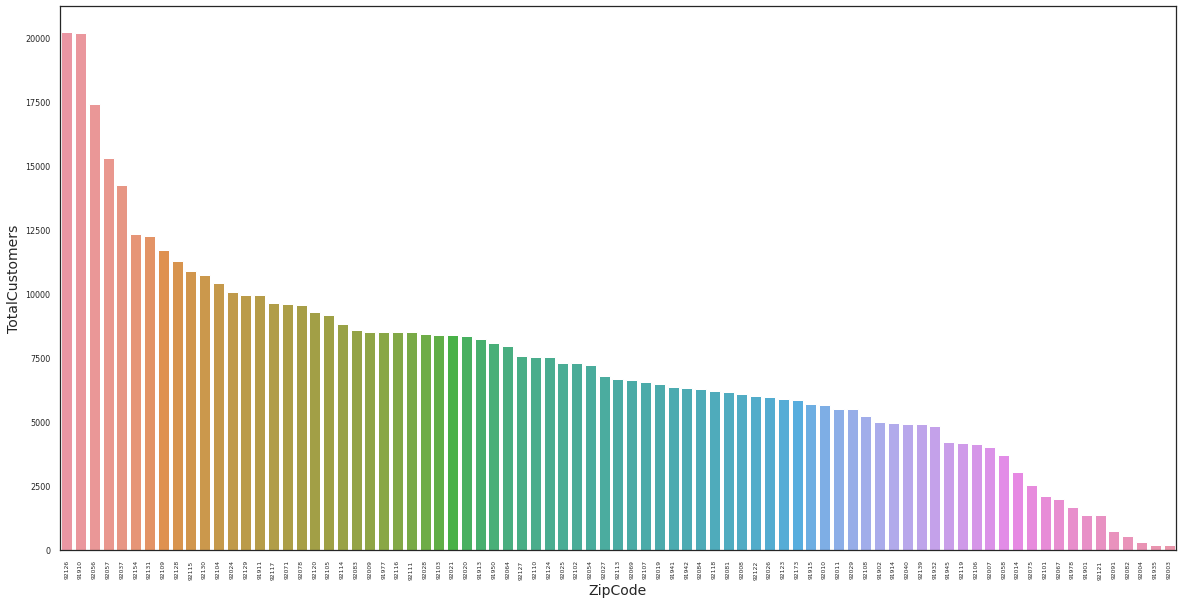

In [ ]:
# Display top 20 most populated zip codes
plt.figure(figsize=(20, 10))

sns.barplot(data=total_customers_by_zip[:20],
            x=total_customers_by_zip['ZipCode'],
            y=total_customers_by_zip['TotalCustomers'],
            order=total_customers_by_zip['ZipCode'])
plt.xticks(rotation=90)

#### Total Therms by Zip

In [ ]:
total_therms_by_zip = grouped_by_zip.sort_values(by=['TotalTherms'], ascending=False).reset_index(drop=True)
total_therms_by_zip.head()

,ZipCode,TotalCustomers,TotalTherms,AverageTherms
0,92121,1365.253968,1.498250e+06,843.608466
1,92037,14236.034188,1.193955e+06,83.529915
2,92101,2123.256983,1.037990e+06,771.178771
3,91910,20174.786325,8.145094e+05,39.076923
4,92126,20194.914530,7.910863e+05,44.213675


In [ ]:
zip_code_thermal_rankings = pd.DataFrame({'ZipCode': total_therms_by_zip['ZipCode'],
              'Thermal_Rank': total_therms_by_zip.index})

zip_code_thermal_rankings.head()

,ZipCode,Thermal_Rank
0,92121,0
1,92037,1
2,92101,2
3,91910,3
4,92126,4


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]),
 <a list of 81 Text major ticklabel objects>)

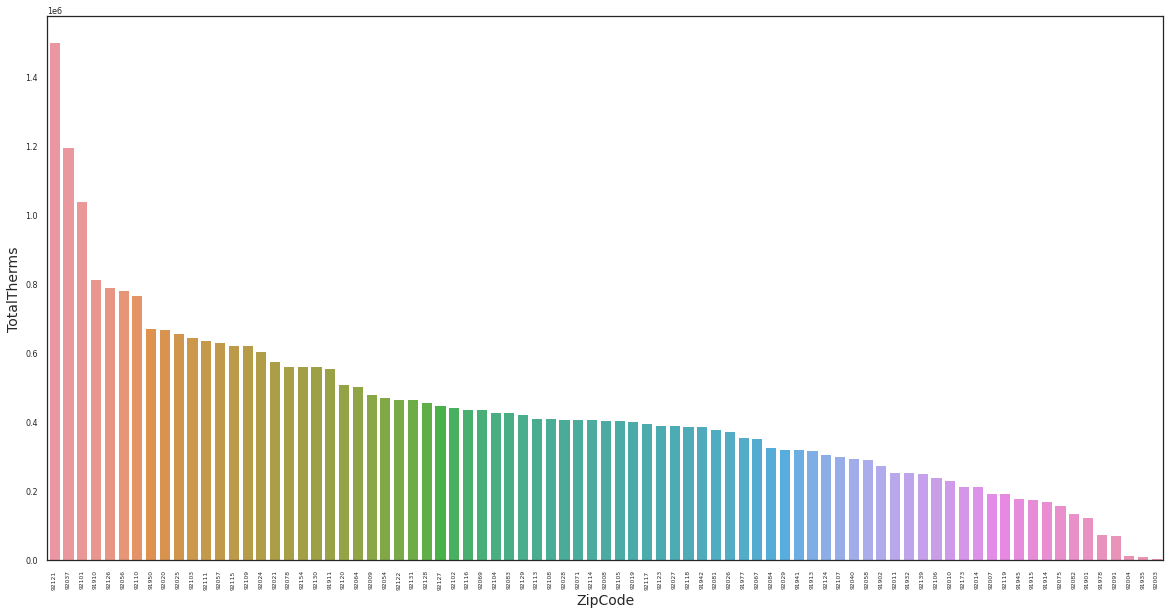

In [ ]:
# Display top 20 most populated zip codes
plt.figure(figsize=(20, 10))

sns.barplot(data=total_therms_by_zip[:20],
            x=total_therms_by_zip['ZipCode'],
            y=total_therms_by_zip['TotalTherms'],
            order=total_therms_by_zip['ZipCode'])
plt.xticks(rotation=90)

#### Avg Total Therms by Avg Therms

In [ ]:
avg_therms_by_zip_code = grouped_by_zip.sort_values(by=['AverageTherms'], ascending=False)

avg_therms_by_zip_code.head()

,ZipCode,TotalCustomers,TotalTherms,AverageTherms
68,92121,1365.253968,1.498250e+06,843.608466
49,92101,2123.256983,1.037990e+06,771.178771
76,92130,10744.086538,5.602521e+05,311.596154
12,91950,8083.863636,6.727341e+05,271.670455
19,92009,8512.212560,4.809622e+05,268.212560


In [ ]:
zip_code_AVG_therm_rankings = pd.DataFrame({'ZipCode': avg_therms_by_zip_code['ZipCode'],
              'AVG_Therm_Rank': avg_therms_by_zip_code.index})

zip_code_AVG_therm_rankings.head()

,ZipCode,AVG_Therm_Rank
68,92121,68
49,92101,49
76,92130,76
12,91950,12
19,92009,19


## Zip Code Ranking statistics

In [ ]:
def dot_plot(df):
    # Make the PairGrid
  g = sns.PairGrid(df,
                  x_vars=df.columns[1:], y_vars=["ZipCode"],
                  height=10, aspect=.50)

  # Draw a dot plot using the stripplot function
  g.map(sns.stripplot, size=10, orient="h", jitter=False,
        palette="flare_r", linewidth=1, edgecolor="w")

  # Use the same x axis limits on all columns and add better labels
  g.set(xlim=(0, 82), xlabel="Ranking", ylabel="")

  # Use semantically meaningful titles for the columns
  titles = df.columns[1:]

  for ax, title in zip(g.axes.flat, titles):

      # Set a different title for each axes
      ax.set(title=title)

      # Make the grid horizontal instead of vertical
      ax.xaxis.grid(False)
      ax.yaxis.grid(True)

  sns.despine(left=True, bottom=True)

In [ ]:
# Merge All Ranking Frames to compare Zip Code statistics
electric_zip_rankings_df = zip_code_customer_count_rankings.merge(zip_code_thermal_rankings, on='ZipCode')
electric_zip_rankings_df.head(3)

,ZipCode,Cust_Rank,Thermal_Rank
0,92126,0,4
1,91910,1,3
2,92056,2,5


In [ ]:
electric_zip_rankings_df = electric_zip_rankings_df.merge(zip_code_AVG_therm_rankings, on='ZipCode')
electric_zip_rankings_df.head(3)

,ZipCode,Cust_Rank,Thermal_Rank,AVG_Therm_Rank
0,92126,0,4,72
1,91910,1,3,2
2,92056,2,5,35


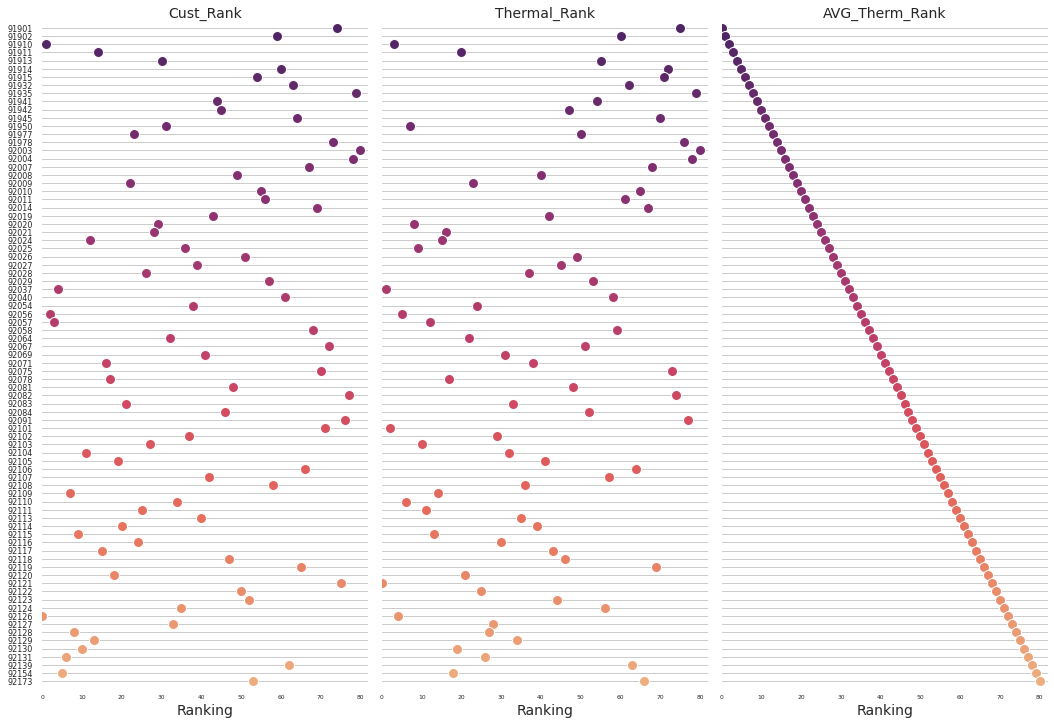

In [ ]:
dot_plot(electric_zip_rankings_df)

Zip Code 91901 has the best average thermal utilization which makes sense due to the assumption that the amount of TotalTherms is nearly equivalent to the Population count described by Cust_Rank.  I assume it is a near 1:1 ratio if not.